# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load Libraries 

import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import pandas as pd

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

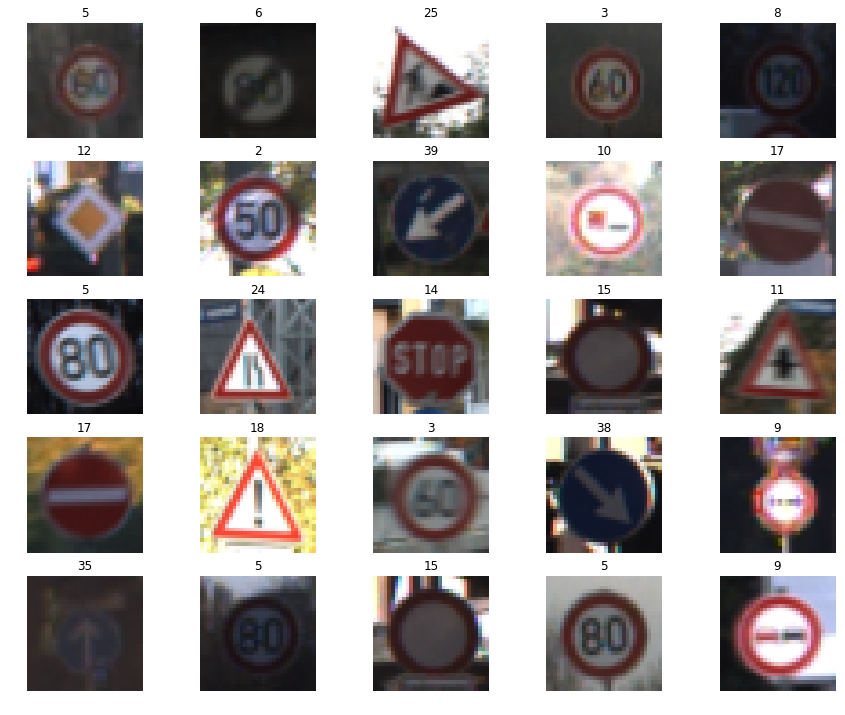

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualization showing 25 random images from the training set
images = []
plt.figure(figsize=(15, 25))
for i in range(0, 25):                         
    plt.subplot(10, 5, i+1)          # subplot(nrows, ncols, plot_number)
    index = random.randint(0, len(X_train)) 
    plt.imshow(X_train[index].squeeze()) 
    plt.title(y_train[index])
    plt.axis('off')
    images.append(len(X_train))
plt.show()

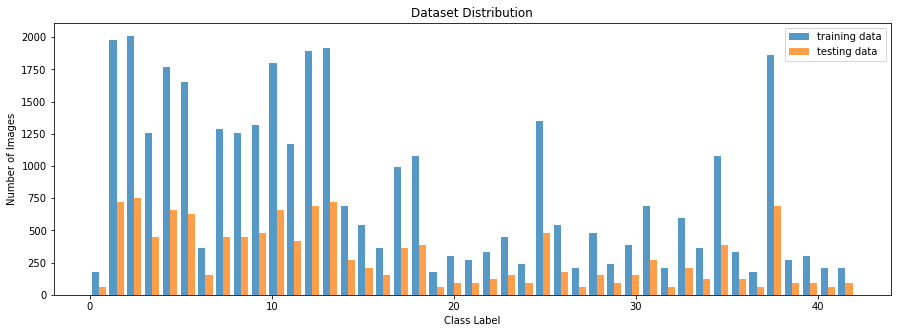

In [38]:
# Dataset Distribution

plt.figure(figsize=(15, 5))

n, bins, patches = plt.hist((y_train, y_test), n_classes, alpha=0.75, label=['training data','testing data'])

plt.legend(loc=1)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Dataset Distribution')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def grayscale(image):
    gray = []
    for i in range(len(image)):
        gray.append(np.dot(image[i][...,:3],[0.299,0.587,0.114]))
    return gray

def normalize(image):
    normal = []
    for i in range(len(image)):
        normal.append(cv2.normalize(image[i], None, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F))
    return normal

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1

Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. 

(OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

### Answer

OpenCV normalization was used to make the activation ranges smaller to better suit neural networks.  I tried several techniques but I wanted to limit the ways the data was processed because many images were in reasonable quality and over-processing the data could ruin the images that already has good visibility.  Of course the computer sees things differently from the naked eye so I hope to build a better understanding of computer vision in the future.  The main issue of the dataset was the contrast variations.   I look to implement something that looks at brightens the image and adjusts the contrast only if the brightness levels is below a certain threshold; however, I’m not sure if this would compromise the data and implementing this is beyond my understanding at the moment.  

As I mentioned the computer see things different and testing the dataset in grayscale required readjusting the image's channels and shape.  I believe having color differentiation is beneficial and the colors were implemented in the real world to improve recognition so I decided to discard grayscale conversion.

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS = 15
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 2

Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc. Consider including a diagram and/or table describing the final model.


### Answer

The LeNet architecture, credited to http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf and https://github.com/udacity/CarND-LeNet-Lab/, is the primary model used for training and classifying traffic signs.  It takes a 32x32 input with 3 different color channels(RGB), which is processed by a convolutional layer, next by a pooling layer.  It goes through another sequence of convolution layers and pooling layers and the input goes through an output layer in the end outputting 43 different classes.  The original model does not include dropout; however, it was added to improve my model and to help with overfitting.  Dropout ensures my network to not rely on any given activation to be present, forcing it to learn a redundant representation for everything to ensure some information remains.  

![LeNet Architecture](lenet.png)
Source: Yan LeCun

Unlike traditonal ConvNets, the type of non-linearities used is different:
* by the use of connections that skip layers 
* by the use of pooling layers with different subsampling ratios for the connections that skip layers and for those that do not

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)    # probability to keep units

rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()

    for offset in range(0, num_examples , BATCH_SIZE):
        batch_x, batch_y = X_data[offset : offset + BATCH_SIZE], y_data[offset : offset + BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
   
    return total_loss/num_examples, total_accuracy/num_examples

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    train_loss_history = []
    valid_loss_history = []
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        valid_loss_history.append(validation_loss)
        train_loss, train_accuracy = evaluate(X_train, y_train)
        train_loss_history.append(train_loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.695
Training Accuracy = 0.746

EPOCH 2 ...
Validation Accuracy = 0.825
Training Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.867
Training Accuracy = 0.933

EPOCH 4 ...
Validation Accuracy = 0.893
Training Accuracy = 0.952

EPOCH 5 ...
Validation Accuracy = 0.897
Training Accuracy = 0.960

EPOCH 6 ...
Validation Accuracy = 0.917
Training Accuracy = 0.972

EPOCH 7 ...
Validation Accuracy = 0.924
Training Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.926
Training Accuracy = 0.981

EPOCH 9 ...
Validation Accuracy = 0.932
Training Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.937
Training Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.939
Training Accuracy = 0.987

EPOCH 12 ...
Validation Accuracy = 0.940
Training Accuracy = 0.988

EPOCH 13 ...
Validation Accuracy = 0.946
Training Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.947
Training Accuracy = 0.992

EPOCH 15 ...
Validation Accuracy = 0.946
Tra

In [21]:
# Training Set Accuracy 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    loss_acc, test_acc = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_acc))

Test Accuracy = 0.931


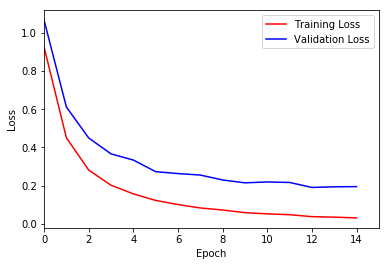

In [12]:
loss_plot = plt.subplot()
loss_plot.set_ylabel('Loss')
loss_plot.set_xlabel('Epoch')
loss_plot.plot(train_loss_history, 'r', label='Training Loss')
loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=1)

credits to @subodh.malgonde for guidance on the loss function. The model appears to have a good learning rate.  

### Question 3

Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.






### Answer

Adjusting the learning rate took several attempts. Lower learning rates required more EPOCHS to accomodate but when learning rates become significantly low, the validation accuracy caps out and starts to decline.  I believe this is a case of overfitting, which needs to be prevented by early termination.

From my experience, lowering the batch_size had showed significant improvements on the validation accuracy.  Perhaps the dataset is very unevenly distributed, even when the dataset is shuffled, the weights are perhaps uneven.   

The learning rate was adjusted based on the training loss graph outputted after the model finished training. Generally, lowering learning rate smoothes the lost curve with diminishing returns.  A learning curve of 0.0005 seemed optimal for this model after thorough testing.  

### Question 4

Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.





### Answer

The first steps I took was changing the variables of the LeNet architechture.  I changed the learning rates with sufficient epochs and to match and it seems the default parameters were quite optimal.  Adding dropout to the architecture made significant improvements to the model.  The reason for this is because the dataset is quite unevenly distributed, thus training it normally makes it prone to overfitting.  Additionally, the variabilities of the visibility of the image set imposes many problems, such as: different lighting, saturations, contrast, blur, sun glare, distorted colors, low resolution, and more.  The dropout helps the model not to rely on certain activations alleviating some of problems caused by visibility.  

Adding more layers to the architecture aiming for a deeper network may improve some aspects, such as parameter efficiency.  However, I believe the default model should be sufficient for this task, as the traffic signs are quite easy to recognize and don't have much variability.  

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [13]:
#Import Sign Names

import csv

sign_names = pd.read_csv('signnames.csv')

print(sign_names)

with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    id = []
    for row in reader:
        id.append(row['SignName'])

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

### Load and Output the Images

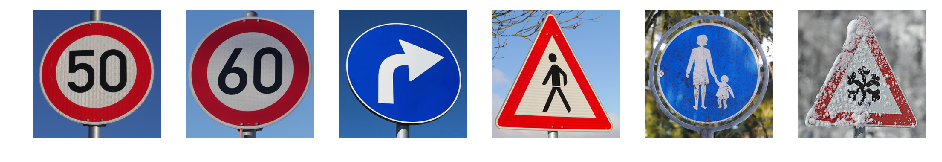

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

img1 = cv2.imread('images/1.png')
img2 = cv2.imread('images/2.png')
img3 = cv2.imread('images/3.png')
img4 = cv2.imread('images/4.png')
img5 = cv2.imread('images/5.png')
img6 = cv2.imread('images/6.png')

imgs = [img1, img2, img3, img4, img5, img6]
labels = np.array([2, 3, 33, 27, 28, 30])

def rgb(img):
    new = []
    for i in range(len(img)):
        new.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB))
    return new 

rgb_img = rgb(imgs)

plt.figure(figsize=(16,4))
for i in range(len(rgb_img)):
    plt.subplot(1, 6, i+1)
    plt.imshow(rgb_img[i])
    plt.axis('off')
plt.show()    

### Predict the Sign Type for Each Image

Prediction Results:


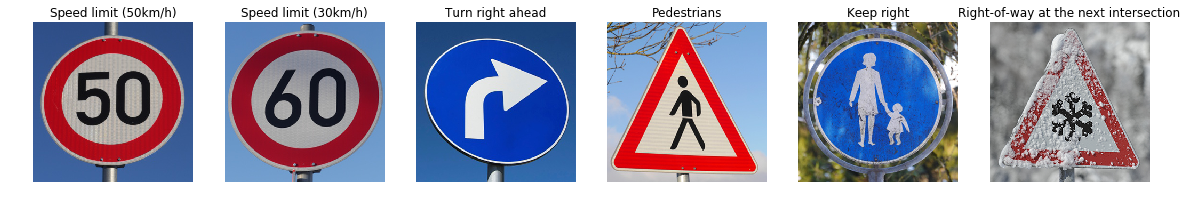

Performance Accuracy = 0.500


In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def resize(img):
    new = []
    for i in range(len(img)):
        new.append(cv2.resize(img[i], (32, 32)))
    return new

img_n = normalize(resize(rgb_img))

predictSoftmax = tf.nn.softmax(logits)

print("Prediction Results:")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict_loss, predict_acc = evaluate(img_n, labels)
    softmaxProb = sess.run(predictSoftmax, feed_dict={x: img_n, keep_prob: 1})
    predicted_labels = np.argmax(softmaxProb, axis=1)
    plt.figure(figsize=(20, 40))
    for i in range(len(predicted_labels)):
        plt.subplot(1, 6, i+1)
        plt.imshow(rgb_img[i])
        plt.title(id[predicted_labels[i]])
        plt.axis('off')
    plt.show()
    print("Performance Accuracy = {:.3f}".format(predict_acc))


### Analyze Performance

The accuracy on the captured images is 50%.  In comparison, testing set projected a 93% accuracy; thus, the model show characteristics of overfitting.

The model technically guessed 3/5 images correctly (having 60% accuracy) as the 5th image (children crossing) is not what it conventionally looks like or different from the trained images in the dataset.  I was curious to see what the model would classify this image as.  

Overall the results were favorable.  Unexpectedly, it got the last image (beware of ice/snow) wrong, even the sign was covered in snow it should have been recognizable.  This shows a few implications of problems it might face in the real world.  Having more data or more optimal data augmentation can improve the current model.  

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [48]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# print(softmaxProb)
with tf.Session() as sess:
    top_k = sess.run(tf.nn.top_k(softmaxProb, k=5))
    print(sess.run(tf.nn.top_k(softmaxProb, k=5)))

TopKV2(values=array([[  6.72561288e-01,   3.26343834e-01,   3.89769179e-04,
          3.67857021e-04,   3.29500035e-04],
       [  8.64823222e-01,   1.33886740e-01,   5.62705798e-04,
          4.58453578e-04,   2.68085656e-04],
       [  1.00000000e+00,   3.81778831e-09,   3.05775127e-11,
          8.65177114e-12,   6.89674988e-13],
       [  9.98658538e-01,   1.26499496e-03,   4.56278249e-05,
          2.55705909e-05,   3.81197469e-06],
       [  9.56692696e-01,   4.32996824e-02,   6.61256399e-06,
          9.57020120e-07,   3.93651760e-08],
       [  9.93912101e-01,   5.53257624e-03,   3.90863977e-04,
          1.36795774e-04,   1.60297932e-05]], dtype=float32), indices=array([[ 2,  1, 31,  7,  5],
       [ 1,  2,  3,  5, 31],
       [33, 35, 40, 39, 30],
       [27, 11, 21, 18, 24],
       [38, 34, 35, 36, 13],
       [11, 30, 21, 23, 28]]))


True Class: Speed limit (50km/h), Label = 2
Predicted Class: Speed limit (50km/h)


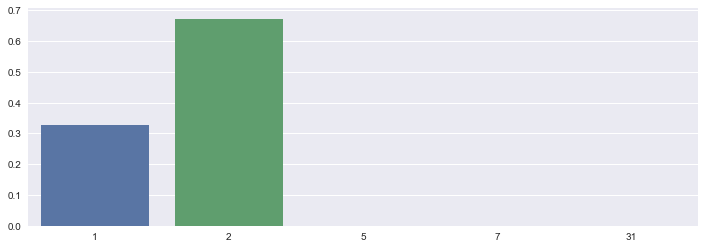

True Class: Speed limit (60km/h), Label = 3
Predicted Class: Speed limit (30km/h)


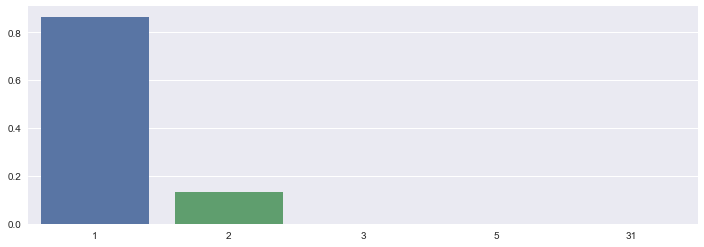

True Class: Turn right ahead, Label = 33
Predicted Class: Turn right ahead


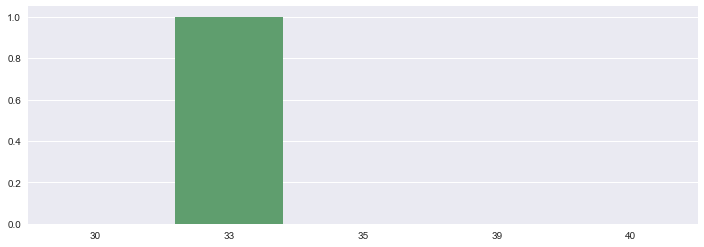

True Class: Pedestrians, Label = 27
Predicted Class: Pedestrians


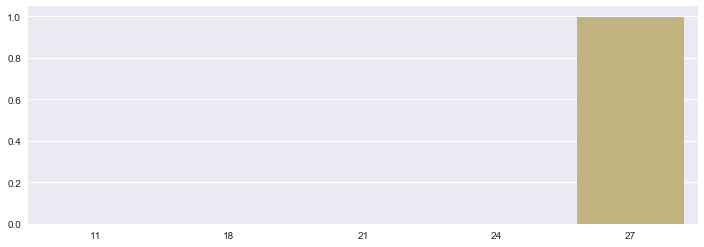

True Class: Children crossing, Label = 28
Predicted Class: Keep right


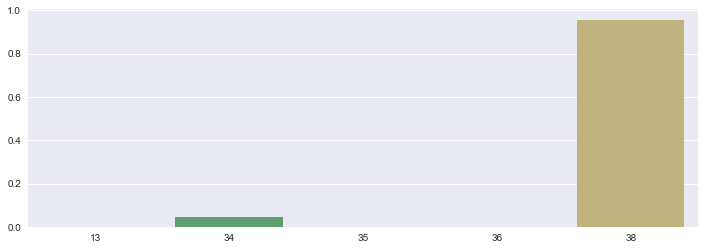

True Class: Beware of ice/snow, Label = 30
Predicted Class: Right-of-way at the next intersection


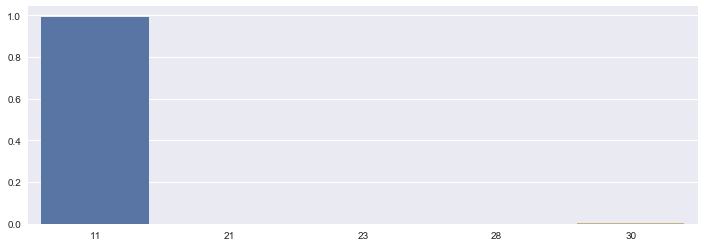

In [74]:
import seaborn as sns

for i in range(6):
    print("True Class: {}".format(id[labels[i]]) + ", Label = {}".format(labels[i]))
    print("Predicted Class: {}".format(id[predicted_labels[i]], labels[i]))
    fig = plt.figure(figsize=(12,4))
    sns.barplot(x=top_k[1][i], y=top_k[0][i])
    plt.show()

### Conclusion

The overall results of the model turned out quite well.  The LeNet architecture is pretty robust in my opinion given how long ago it was developed.  

For some instances of my output I was able to reach 95%+ validation accuracy and have a much smoother loss curve.  However, the discrepancy of the results is within 2 to 3%.  I believe implementing dropout is the cause for this small deviation or perhaps a different GPU would also affect this?

My concerns of limitations would be the 32x32 input which fed the model poor quality images to learn from.    In the future, I look forward to implementing different models such as AlexNet and GooLeNet to compare the differences and improve my understanding of neural networks.   

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [17]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")